In [1]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
from datetime import datetime
import os
def euclid(df):
    return np.sqrt((df['centroid_x'] - df['centroid_x'].shift(1))**2 + 
                   (df['centroid_y'] - df['centroid_y'].shift(1))**2
)

In [2]:
pth = Path(r'/home/oldboy/Documents/GitHub/thermal tognini/thermal_data')

content = os.listdir(pth)
content = list(filter(lambda x: (pth/x).is_dir(), content ) ) 

subjects = dict()
for c in content:
    parts = c.split('-')
    sub_id = parts[2]
    if sub_id not in subjects.keys():
        subjects[sub_id] = dict()
        subjects[sub_id]['id'] = parts[2] 
        subject_parts = subjects[sub_id]['id'].split('_')
        subjects[sub_id]['geno'] = subject_parts[0]
        subjects[sub_id]['number'] = subject_parts[1]
        subjects[sub_id]['recordings'] = [(pth/c/'data.csv').as_posix()]
    else:
        subjects[sub_id]['recordings'].append( (pth/c/'data.csv').as_posix() )

subjects = pd.DataFrame.from_dict(subjects).T.reset_index(drop=True)
subjects['recordings'] = subjects['recordings'].apply(sorted)


In [25]:

for i,row in subjects.iterrows():
    if i==4:
        break

data = list()
for i,rec in enumerate(row['recordings']):
    df = dd.read_csv(rec,sep=';', skiprows=1,dtype={'isDay': 'float64'}, parse_dates=['Date'])
    df['temp_med_delta'] = (df['temp_med']-df['temp_med'].mean())
    df['distance'] = euclid(df)
    df['RT_delta'] = df['RT']-df['RT'].mean()
    data.append(df)

data = dd.concat(data)
data['start_date'] = data['Date'].min()
data['day'] = (data['Date'] - data['start_date']).dt.days + 1
data = data.groupby(['minute','day']).mean().compute()
data['temp_rt_delta'] = data['temp_avg']-data['RT']
data['temp_rt_delta'] = data['temp_rt_delta'] - data['temp_rt_delta'].mean()
data['temp_norm'] = data['temp_avg']-data['temp_avg'].mean()
data['RT_norm'] = data['RT']-data['RT'].mean()
data['temp_rt_correct'] = data['temp_norm']-data['RT_norm']

#min_date = data['Date'].min().compute()
#data = data.set_index('Date')
#data = data.assign(data_rel = (data['Date'] - min_date).dt.days.compute() ) 
#data.head()



In [26]:
data.reset_index().loc[1430:1450]

,minute,day,ID,timeStamp,hour,RT,isDay,temp_avg,temp_med,temp_max,centroid_x,centroid_y,temp_med_delta,distance,RT_delta,temp_rt_delta,temp_norm,RT_norm,temp_rt_correct
1430,1422,1,418268.5,476197.541047,23.0,23.953629,0.0,27.138355,27.138355,29.160254,65.217542,46.214885,0.266709,0.041593,0.438576,-0.060570,0.363633,0.424204,-0.060570
1431,1423,1,418774.0,476257.477581,23.0,23.971560,0.0,27.236684,27.236684,29.307271,65.200422,45.390664,0.365038,0.139656,0.456507,0.019827,0.461962,0.442134,0.019827
1432,1424,1,419278.0,476317.535549,23.0,23.985500,0.0,27.136016,27.136016,29.358955,65.714349,44.717427,0.264369,0.054296,0.470446,-0.094780,0.361294,0.456074,-0.094780
1433,1425,1,419781.0,476377.564347,23.0,23.958099,0.0,27.063405,27.063405,29.186299,65.784312,45.110239,0.191759,0.029734,0.443046,-0.139990,0.288683,0.428673,-0.139990
1434,1426,1,420286.0,476437.522846,23.0,23.926431,0.0,27.130936,27.130936,29.378570,65.625853,44.962483,0.259290,0.043574,0.411378,-0.040791,0.356214,0.397005,-0.040791
1435,1427,1,420794.0,476497.542888,23.0,23.890227,0.0,27.158776,27.158776,29.374062,65.482729,44.654599,0.287130,0.038604,0.375174,0.023253,0.384054,0.360802,0.023253
1436,1428,1,421302.5,476557.514351,23.0,23.851087,0.0,27.175302,27.175302,29.354794,65.389708,44.594287,0.303655,0.033879,0.336034,0.078918,0.400580,0.321661,0.078918
1437,1429,1,421810.5,476617.526508,23.0,23.807985,0.0,27.223490,27.223490,29.271403,65.028684,44.124737,0.351843,0.066352,0.292931,0.170209,0.448767,0.278559,0.170209
1438,1430,1,422317.0,476677.419749,23.0,23.773822,0.0,27.201000,27.201000,29.265551,64.572308,43.141337,0.329354,0.039268,0.258768,0.181882,0.426278,0.244396,0.181882
1439,1431,1,422820.0,476737.605210,23.0,23.799969,0.0,27.156379,27.156379,29.484112,65.236891,43.192583,0.284733,0.033318,0.284915,0.111114,0.381657,0.270543,0.111114


<IPython.core.display.Javascript object>


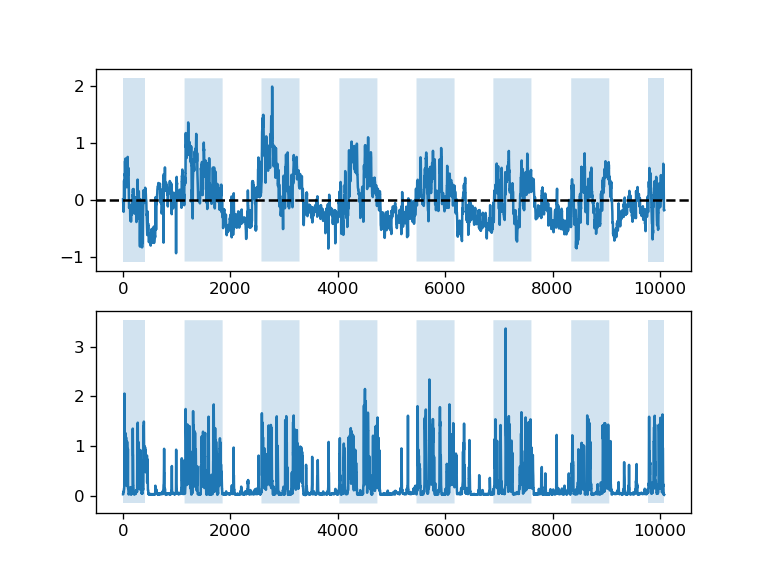

In [27]:
%matplotlib notebook
fig,ax = plt.subplots(2,1)

temperature = data['temp_rt_delta'].reset_index(drop=True).rolling(5,min_periods=1,center=True).median()
ax[0].plot(temperature)
ax[0].axhline(0,color='k',linestyle='--')
lims = ax[0].get_ylim()
ax[0].fill_between(temperature.index, lims[0], lims[1],where= data['isDay'].reset_index(drop=True)<.00001,alpha=.2)

motion = data['distance'].reset_index(drop=True).rolling(5,min_periods=1,center=True).median()
ax[1].plot(motion)
lims = ax[1].get_ylim()
ax[1].fill_between(temperature.index, lims[0], lims[1],where= data['isDay'].reset_index(drop=True)<.00001,alpha=.2)


<IPython.core.display.Javascript object>


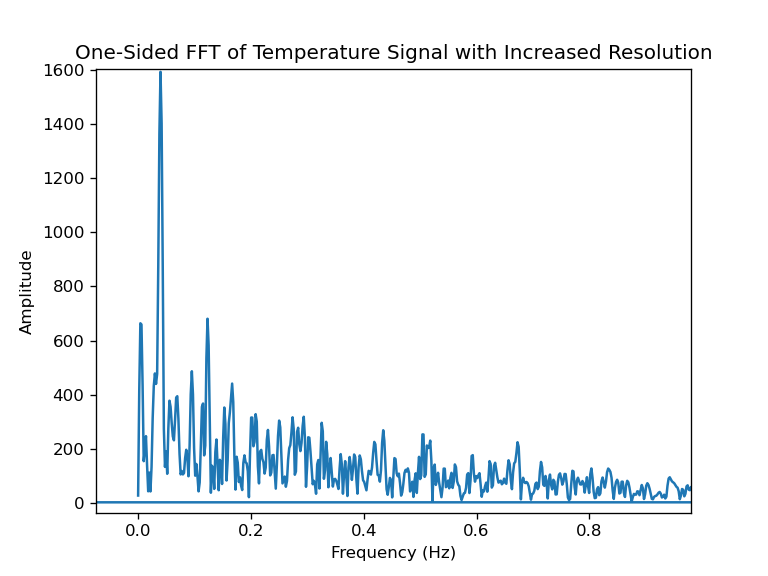

Text(0.5, 1.0, 'One-Sided FFT of Temperature Signal with Increased Resolution')

In [28]:


import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a temperature signal stored in a list or array called "temperature"
# with a sampling rate of 1 per minute
sig = temperature

# Assuming you have a temperature signal stored in a list or array called "temperature"
# with a sampling rate of 1 per minute

# Number of data points
N = len(sig)

# Calculate the sampling frequency
sampling_rate = 60  

# Pad the data with zeros
padded_temperature = np.pad(sig, (0, N*2), mode='constant')

# Number of padded data points
padded_N = len(padded_temperature)

# Calculate the frequencies for the padded FFT
frequencies = np.fft.fftfreq(padded_N, d=1/sampling_rate)

# Perform the padded FFT
fft_values = np.fft.fft(padded_temperature)

# Take only the positive frequencies and corresponding FFT values
positive_frequencies = frequencies[:padded_N//2 + 1]
positive_fft_values = fft_values[:padded_N//2 + 1]

# Plot the one-sided FFT results with increased resolution
fig,ax = plt.subplots()
plt.plot(positive_frequencies, np.abs(positive_fft_values))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('One-Sided FFT of Temperature Signal with Increased Resolution')


In [12]:

def parsedate(date):
    try:
        return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day
    except:
        return np.nan

#for i,row in df.iterrows():
#     print( int( row['Date'].split(' ')[0].split('-')[-1]) ) 
df['Day'] = df['Date'].apply(lambda x: int(x.split(' ')[0].split('-')[-1]), meta=('int') )
df['Day_rel'] = df['Day'] - df['Day'].unique().compute().min()
#df['Day_rel'] = df['Day']-df['Day'].loc[0]
df.head()

C:\Users\pupil\anaconda3\lib\site-packages\dask\dataframe\core.py:6169: FutureWarning: Meta is not valid, `map_partitions` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


,index_old,ID,Date,timeStamp,hour,minute,RT,isDay,temp_avg,temp_med,temp_max,centroid_x,centroid_y,distance,Day
0,0,1.0,2023-05-19 12:00:00,2027.809737,12.0,720.0,20.486520,1.0,25.495870,25.495870,28.647199,76.937322,45.588590,NaN,19
1,1,2.0,2023-05-19 12:00:00,2028.015251,12.0,720.0,20.493791,1.0,25.325776,25.325776,28.440092,78.679304,45.558714,1.742238,19
2,2,3.0,2023-05-19 12:00:00,2028.127524,12.0,720.0,20.500572,1.0,25.444307,25.444307,28.552307,78.295316,45.377368,0.424657,19
3,3,4.0,2023-05-19 12:00:00,2028.245897,12.0,720.0,20.496732,1.0,25.381336,25.381336,28.466030,77.857371,44.580024,0.909700,19
4,4,5.0,2023-05-19 12:00:00,2028.355840,12.0,720.0,20.492320,1.0,25.401985,25.401985,28.640290,78.615925,44.828350,0.798167,19


In [22]:
df['Day_rel'].unique().compute()

0    0
1    1
2    2
3    3
Name: Day_rel, dtype: int64

In [17]:

#df['mot_dist'] = np.sqrt((df['centroid_x'] - df['centroid_x'].shift(1))**2 + (df['centroid_y'] - df['centroid_y'].shift(1))**2)
#df['mot_dist'] = df['mot_dist'].fillna(0)



avg_min
#avg_min

,ID,timeStamp,hour,RT,isDay,temp_avg,temp_med,temp_max,centroid_x,centroid_y,distance
0,1.336434e+06,155847.136659,6.0,20.928277,0.000000,24.925562,24.925562,27.409255,45.632617,75.221100,0.663761
1,1.339281e+06,156172.399806,6.0,20.909420,0.597041,25.012292,25.012292,27.473522,44.624407,77.711148,0.630961
2,1.339671e+06,156218.470433,6.0,20.905223,1.000000,24.838781,24.838781,27.161659,48.362016,86.507362,0.468760
3,1.343349e+06,156640.463707,6.0,20.903320,1.000000,24.810668,24.810668,27.235981,51.050258,91.076157,0.222031
4,1.343131e+06,156616.988766,6.0,20.898115,1.000000,24.820788,24.820788,27.236991,48.647908,89.847007,0.322865
...,...,...,...,...,...,...,...,...,...,...,...
1436,1.345731e+06,156909.814315,6.0,20.934016,0.000000,24.817289,24.817289,27.277771,47.785162,85.979589,0.530997
1437,1.341345e+06,156406.007745,6.0,20.939502,0.000000,24.786358,24.786358,27.323865,44.175829,81.319092,0.785412
1438,1.336503e+06,155852.942435,6.0,20.933071,0.000000,24.851544,24.851544,27.305942,46.083188,80.210620,0.840904
1439,1.334818e+06,155660.904451,6.0,20.906522,0.000000,24.913386,24.913386,27.426630,43.668838,81.474248,0.728567


<IPython.core.display.Javascript object>


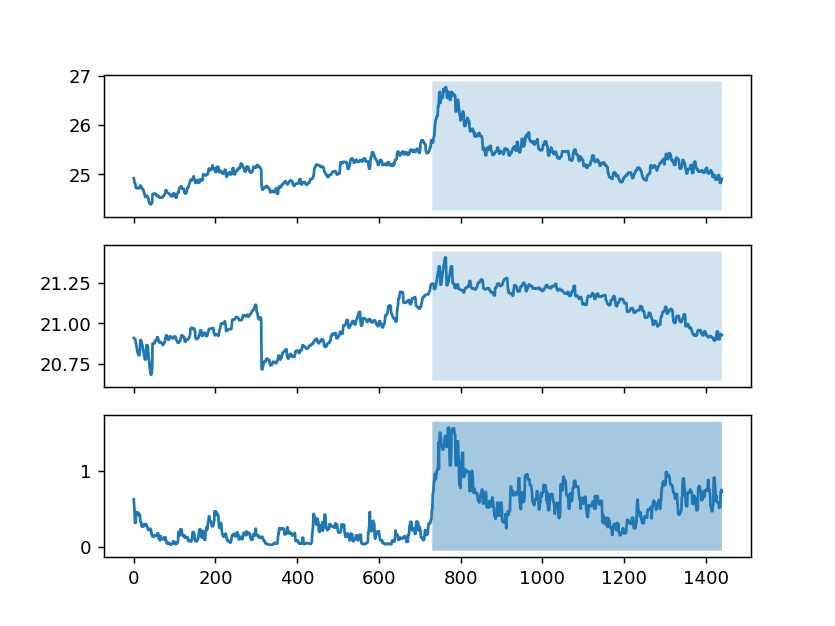

In [18]:

%matplotlib notebook

fig,ax = plt.subplots(3,1,sharex=True)

avg_min[['temp_avg','RT','distance']] = avg_min[['temp_avg','RT','distance']].rolling(5,center=True,min_periods=1).median()
ax[0].plot(avg_min.index,avg_min['temp_avg'])
ylim = ax[0].get_ylim()
ax[0].fill_between(avg_min.index,y1=ylim[0],y2=ylim[1], where=avg_min['isDay']<0.5,alpha=.2)

ax[1].plot(avg_min.index,avg_min['RT'])
ylim = ax[1].get_ylim()
ax[1].fill_between(avg_min.index,y1=ylim[0],y2=ylim[1], where=avg_min['isDay']<0.5,alpha=.2)

ax[2].plot(avg_min.index,avg_min['distance'])
ylim = ax[2].get_ylim()
ax[2].fill_between(avg_min.index,y1=ylim[0],y2=ylim[1], where=avg_min['isDay']<0.5,alpha=.4)


In [23]:


pth = Path(r'C:\Users\pupil\Downloads\thermal_behaviour_72_h')


def readTher(fnames):
    df = dd.read_csv((fnames/'data.csv').as_posix(), sep=';', skiprows=1, 
                     assume_missing=True)  
    df['distance'] = df.map_partitions(euclid) # da cambiare
    df = df.reset_index().rename(columns={'index':'index_old'})

    avg_min = df.groupby(['ID']).mean()
    avg_min = df.groupby(['minute']).mean()

    avg_min = avg_min.compute()
    avg_min = pd.concat([avg_min.loc[407:],avg_min.loc[:407]]).reset_index(drop=True)
    return avg_min

fnames = pth / '20230519_113859-ROI_*-WT_*'
wt = readTher(fnames)
fnames = pth / '20230519_113859-ROI_*-KO_*'
ko = readTher(fnames)


<IPython.core.display.Javascript object>


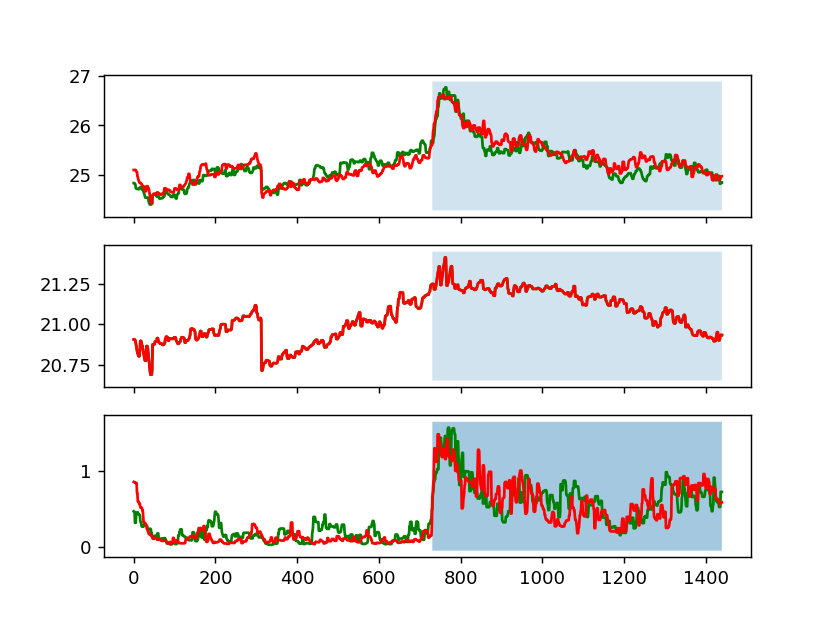

In [29]:
%matplotlib notebook

fig,ax = plt.subplots(3,1,sharex=True)

wt[['temp_avg','RT','distance']] = wt[['temp_avg','RT','distance']].rolling(5,center=True,min_periods=1).median()
ko[['temp_avg','RT','distance']] = ko[['temp_avg','RT','distance']].rolling(5,center=True,min_periods=1).median()

ax[0].plot(wt.index,wt['temp_avg'],'g')
ax[0].plot(ko.index,ko['temp_avg'],'r')
ylim = ax[0].get_ylim()
ax[0].fill_between(wt.index,y1=ylim[0],y2=ylim[1], where=wt['isDay']<0.5,alpha=.2)

ax[1].plot(wt.index,wt['RT'],'g')
ax[1].plot(ko.index,ko['RT'],'r')
ylim = ax[1].get_ylim()
ax[1].fill_between(wt.index,y1=ylim[0],y2=ylim[1], where=wt['isDay']<0.5,alpha=.2)

ax[2].plot(wt.index,wt['distance'],'g')
ax[2].plot(ko.index,ko['distance'],'r')
ylim = ax[2].get_ylim()
ax[2].fill_between(wt.index,y1=ylim[0],y2=ylim[1], where=wt['isDay']<0.5,alpha=.4)

